# Предобработка данных и их прогнозирование

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sktime.utils.plotting import plot_series
from sklearn.ensemble import IsolationForest

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = 'Month_Value_1.csv'
df = pd.read_csv(file_path)

## 1. Просмотр информации о таблице с данными

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    96 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     float64
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [4]:
df.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


In [5]:
df.tail()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
91,01.08.2022,NaN,NaN,NaN,NaN
92,01.09.2022,NaN,NaN,NaN,NaN
93,01.10.2022,NaN,NaN,NaN,NaN
94,01.11.2022,NaN,NaN,NaN,NaN
95,01.12.2022,NaN,NaN,NaN,NaN


## 2. Удаление пропусков и дубликатов

In [6]:
df_clean_1 = df.dropna() # удаляет пустые строки
df_clean_2 = df_clean_1.drop_duplicates() # удаляет строки дубли

In [7]:
df_clean_2

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
59,01.12.2019,5.875647e+07,38069.0,1543.420464,29878525.0
60,01.01.2020,5.628830e+07,27184.0,2070.640850,29044998.0
61,01.02.2020,4.022524e+07,23509.0,1711.057181,29044998.0
62,01.03.2020,5.002217e+07,32569.0,1535.882748,29044998.0


## 3. Удаление выбросов с помощью ML-метода Isolation Forest

In [8]:
# создание метода
if_forecast = IsolationForest(contamination=0.02, random_state=16) # перв. переменная указывает на долю выбросов в данных, 
                                                                   # а вторая для сохранения повторяемости результата
df_clean_2['Result_emissions'] = if_forecast.fit_predict(df_clean_2[['Revenue']]) # если будет выброос, то результат запищется в новый столбец Result_emissions  
                                                                     # выброс = -1, не выброс = 1



In [9]:
df_clean_2

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region,Result_emissions
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0,1
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0,1
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0,1
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0,1
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0,-1
...,...,...,...,...,...,...
59,01.12.2019,5.875647e+07,38069.0,1543.420464,29878525.0,-1
60,01.01.2020,5.628830e+07,27184.0,2070.640850,29044998.0,1
61,01.02.2020,4.022524e+07,23509.0,1711.057181,29044998.0,1
62,01.03.2020,5.002217e+07,32569.0,1535.882748,29044998.0,1


In [10]:
df_clean_3 = df_clean_2[df_clean_2['Result_emissions'] == 1].drop(columns=['Result_emissions']) # оставляём строки с 1 и убираем новый столбец

In [11]:
df_clean_3

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
5,01.06.2015,1.678393e+07,13160.0,1275.374508,30024676.0
...,...,...,...,...,...
58,01.11.2019,3.637496e+07,21987.0,1654.384704,29878525.0
60,01.01.2020,5.628830e+07,27184.0,2070.640850,29044998.0
61,01.02.2020,4.022524e+07,23509.0,1711.057181,29044998.0
62,01.03.2020,5.002217e+07,32569.0,1535.882748,29044998.0


## 4. Отсев ненужных данных

In [12]:
df_halffinal = df_clean_3[['Period', 'Revenue']]

In [13]:
df_halffinal

,Period,Revenue
0,01.01.2015,1.601007e+07
1,01.02.2015,1.580759e+07
2,01.03.2015,2.204715e+07
3,01.04.2015,1.881458e+07
5,01.06.2015,1.678393e+07
...,...,...
58,01.11.2019,3.637496e+07
60,01.01.2020,5.628830e+07
61,01.02.2020,4.022524e+07
62,01.03.2020,5.002217e+07


## 5. Форматирование данных

In [14]:
df_final = df_halffinal.copy()

# изменяем тип данных у столбца Period на datatime
df_final['Period'] = pd.to_datetime(df_final['Period'], format='%d.%m.%Y')

# делаем столбец Period индексом
df_final.set_index('Period', inplace=True)

In [15]:
df_final

,Revenue
Period,
2015-01-01,1.601007e+07
2015-02-01,1.580759e+07
2015-03-01,2.204715e+07
2015-04-01,1.881458e+07
2015-06-01,1.678393e+07
...,...
2019-11-01,3.637496e+07
2020-01-01,5.628830e+07
2020-02-01,4.022524e+07


## 6. График временного ряда 

<Figure size 1500x600 with 0 Axes>

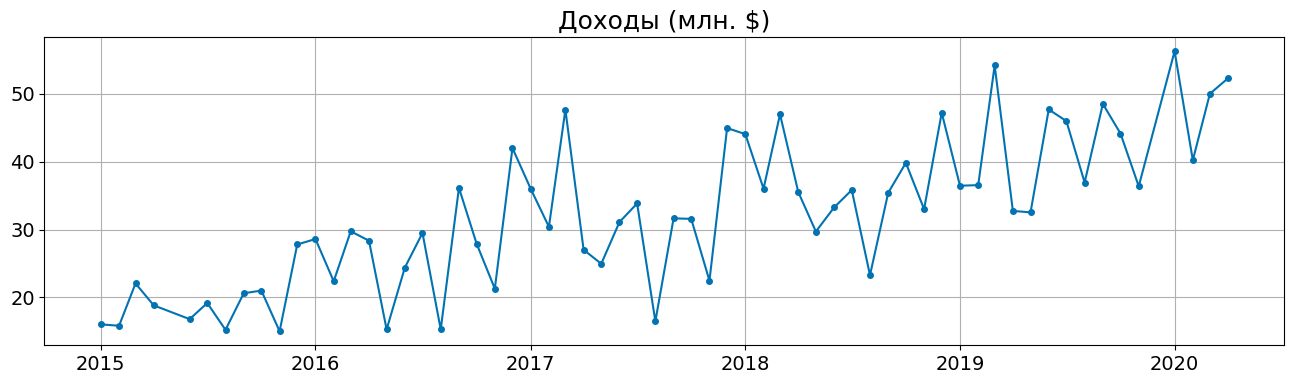

In [16]:
plt.figure(figsize=(15,6))

y = df_final.Revenue / 10**6

plot_series(y)
plt.title('Доходы (млн. $)', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(which='major')
plt.ylabel('')

plt.show()

## 7. Функция проверки качества прогноза с помощью MAPE

### $$MAPE=\frac{100}{n}\sum_{i=1}^{n}\frac{\left| y_{i}-\hat{y}_{i} \right|}{y_{i}}$$

### где ${y}_{i} -$ фактические значения,

### $\hat{y}_{i}$ - прогнозируемые значения,

### $n$ - кол-во наблюдений

In [17]:
def mape(y_fact, y_forecast):
    return np.mean(np.abs((y_fact - y_forecast) / y_fact)) * 100

## 8. Разбиение данных на обучение и контроль 

46 16


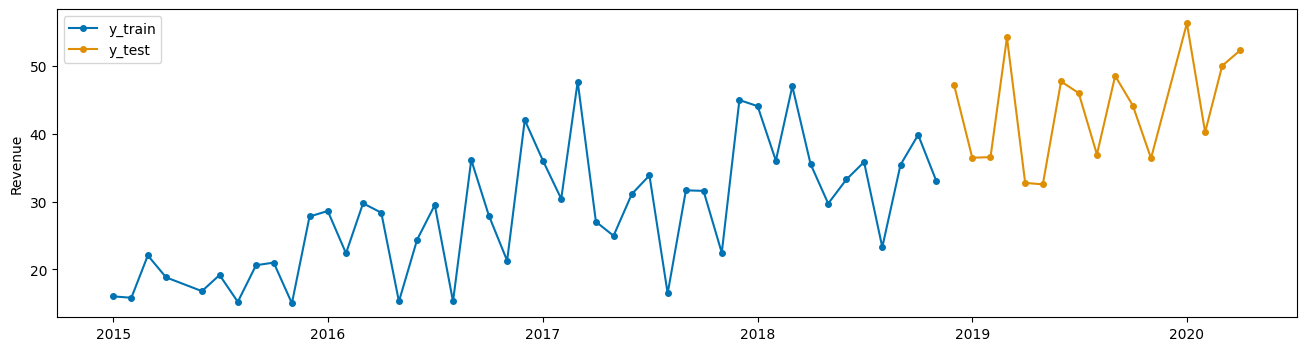

In [18]:
from sktime.forecasting.model_selection import temporal_train_test_split

y_train, y_test = temporal_train_test_split(y, test_size=16)
plot_series(y_train, y_test, labels=["y_train","y_test"])
print(y_train.shape[0], y_test.shape[0])

#### Чтобы прогнозы корректно индексировались, заведём отдельную переменную с индексами-датами

In [19]:
from sktime.forecasting.base import ForecastingHorizon
k = y_test.to_period("M")
ind_date = ForecastingHorizon(y_test.index, is_relative=False)
ind_date_ets = ForecastingHorizon(k.index, is_relative=False)
ind_date

ForecastingHorizon(['2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01'],
              dtype='datetime64[ns]', freq=None, is_relative=False)

In [20]:
ind_date_ets

ForecastingHorizon(['2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05',
             '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11',
             '2020-01', '2020-02', '2020-03', '2020-04'],
            dtype='period[M]', is_relative=False)

## 9. Методы прогнозов и их оценка

### 9.1 Наивный прогноз

In [21]:
from sktime.forecasting.naive import NaiveForecaster

forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)

y_pred = forecaster.predict(ind_date)

plot_series(y_train, y_test, y_pred, 
            labels=["y_train","y_test", "y_pred"])

NullFrequencyError: Cannot shift with no freq

In [ ]:
mape(y_test, y_pred)

#### Возьмём среднее за последние window_length наблюдений

In [ ]:
forecaster = NaiveForecaster(strategy="mean", window_length=12)
forecaster.fit(y_train)

y_pred = forecaster.predict(ind_date)

plot_series(y_train, y_test, y_pred, 
            labels=["y_train","y_test", "y_pred"])

In [ ]:
mape(y_test, y_pred)

### 9.2 ETS (ANN)

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

y_train.index = pd.to_datetime(y_train.index).to_period("M")
y_test.index = pd.to_datetime(y_test.index).to_period("M")

In [ ]:
forecaster = ExponentialSmoothing()
forecaster.fit(y_train)

y_pred = forecaster.predict(ind_date_ets)

plot_series(y_train, y_test, y_pred, 
            labels=["y_train","y_test", "y_pred"])

In [ ]:
mape(y_test, y_pred)

### 9.3 ETS (AAA)

In [ ]:
forecaster = ExponentialSmoothing(trend="add", seasonal="add", sp=12)
forecaster.fit(y_train)

y_pred = forecaster.predict(ind_date_ets)

plot_series(y_train, y_test, y_pred, 
            labels=["y_train","y_test", "y_pred"])

In [ ]:
mape(y_test, y_pred)

### 9.4 AUTO-ETS

#### Данная модель просто перебирает все модели ETS и находит самую подходящую по какому-то критерию

In [ ]:
from sktime.forecasting.ets import AutoETS

forecaster = AutoETS(auto=True, n_jobs=-1, information_criterion='bic')
forecaster.fit(y_train)

y_pred = forecaster.predict(ind_date_ets)

plot_series(y_train, y_test, y_pred, 
            labels=["y_train","y_test", "y_pred"])

In [ ]:
mape(y_test, y_pred)